## <center>Home Assignment #2: Power law</center>

### <center>Student: *Ivanova Polina*</center>

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
from collections import OrderedDict

### Task 1


**Model A**
<br \>
Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

In [257]:
def modelA(N,m,n0 = m,m0 = m, directed = False):
    ## N --- total number of nodes
    ## m --- number of edges which we add on each step
    ## n0 --- initial number of nodes
    ## m0 --- initial number od edges, m0 >= n0
    if not directed:
        G = nx.gnm_random_graph(n0,m0)
    else:
        G = nx.gnm_random_graph(n0,m0, directed = True)
    nodes = []
    targets=list(range(n0))
    nodes.extend(targets)
    source = n0
    avrg_path_length = {}
    avrg_clust_coeff = {}
    while source < N:
        if source % 50 == 0:
            avrg_path_length[source] = nx.average_shortest_path_length(G)
            avrg_clust_coeff[source] = nx.average_clustering(G)
            
        G.add_edges_from(zip([source]*m,targets))
        nodes.append(source)
        targets = np.random.choice(nodes, size = m)
        source += 1

    return G, avrg_path_length, avrg_clust_coeff


In [258]:
def plot_graph_with_blobs(graph, node_size_mult, font_size):
    k = nx.degree(graph)
    plt.figure(1, figsize=(20,20))
    coord = nx.spring_layout(graph)
    nx.draw_networkx(graph,
                     pos=coord,
                     nodelist=k.keys(),
                     node_size = [d*node_size_mult for d in k.values()],
                     node_color = k.values(),
                     font_size = font_size,
                     cmap=plt.cm.Reds,
                     )

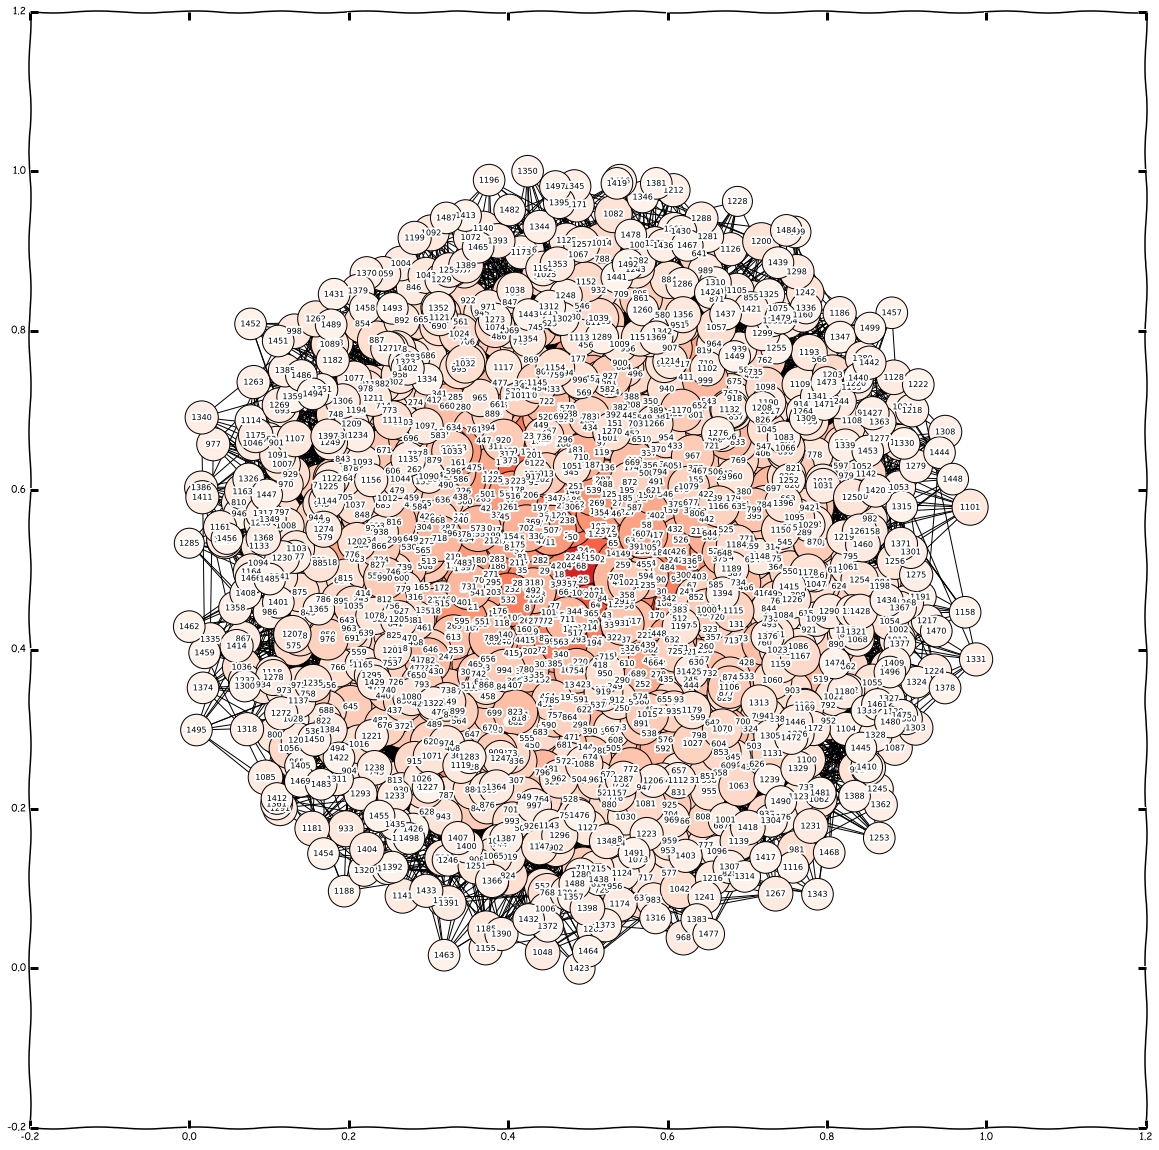

In [259]:
N = 1500
m = 10
n0 = 20
m0 = 25

Ga, avrg_path_length_a, avrg_clust_coeff_a = modelA(N,m,n0,m0)

plot_graph_with_blobs(Ga, node_size_mult = 100, font_size = 8)

#### PDF/CDF
Distribution looks similar to the exponential distribution.

In the graph with CDF we plot the Theoretical CDF:
    $$ F(x) = 1 - exp\left(\frac{m-x}{m}\right), m = 10,$$
which is close to our Emperical CDF.

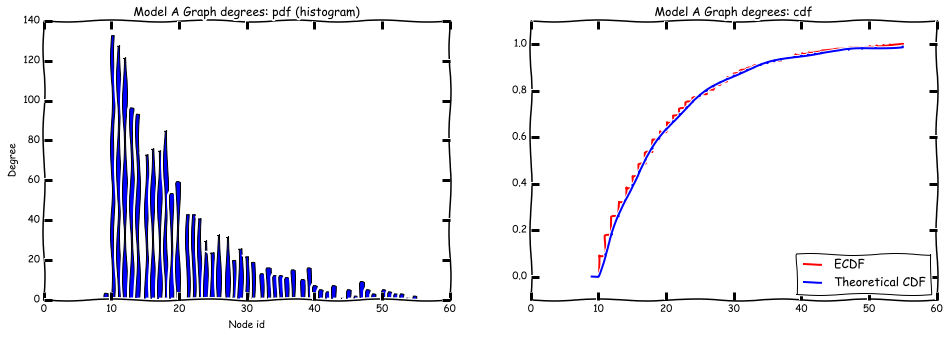

In [260]:
def cdf(arr):
    arr=np.sort(np.array(arr))
    n=len(arr)
    y = [1./n for i in arr]
    y = np.cumsum(y)
    return y

def degrees_pdf_cdf(G, theory_pdf = None, theory_cdf = None):
    #k_rout -- degrees of vertices, ks_rout -- sorted
    k_rout = G.degree()
    ks_rout = np.array(k_rout.values())
    ks_rout = np.sort(ks_rout)[::-1]

    plt.figure( 2, figsize = ( 16, 5 ) )
    plt.subplot (1, 2, 1)
    plt.title('Model A Graph degrees: pdf (histogram)')
    plt.hist(ks_rout, bins = 100, label = 'Empirical PDF')
    if theory_pdf:
        plt.plot(ks_rout[::-1], theory_pdf(ks_rout[::-1]), '-g', label = 'Theoretical PDF')
        plt.legend()
    plt.ylabel('Degree')
    plt.xlabel('Node id')
        
    plt.subplot (1, 2, 2)
    plt.title('Model A Graph degrees: cdf')
    plt.ylim(-0.1, 1.1)
    plt.plot(ks_rout[::-1], cdf(ks_rout), '-r', label = 'ECDF')
    if theory_cdf:
        plt.plot(ks_rout[::-1], theory_cdf(ks_rout[::-1]), '-b', label = 'Theoretical CDF')
        plt.legend(loc = 4)
    
def cdf_exp(x, m):
    x = list(x)
    f = []
    for i in x:
        if i >= m:
            f.append(1 - np.exp(float(m-i)/m))
        else:
            f.append(0)
    return f
        
degrees_pdf_cdf(Ga, theory_cdf = lambda x: cdf_exp(x, m))

#### Illustration of dependencies

In [261]:
def plot_dependencies(model_name_string, path_len, clust_coeff, 
                      theory_path_len = None, theory_clust_coeff=None):
    #1.3.1 dependence:  average path length to the number of nodes
    plt.figure( figsize = ( 16, 5 ) )
    plt.subplot (1, 2, 1)
    plt.title('Model {0}: average path length to the number of nodes'.format(model_name_string))
    path_len = OrderedDict(sorted(path_len.items()))
    plt.plot(path_len.keys(), path_len.values(), '-r', label = 'Emperical')
    if theory_path_len:
        plt.plot(path_len.keys(), theory_path_len(path_len.keys()), '-b', label = 'Theoretical')
        plt.legend(loc = 4)

    #1.3.2 dependence:  average clustering coefficient to the number of nodes
    plt.subplot (1, 2, 2)
    plt.title('Model {0}: average clustering coefficient to the number of nodes'.format(model_name_string))
    clust_coeff = OrderedDict(sorted(clust_coeff.items()))
    plt.plot(clust_coeff.keys(), clust_coeff.values(), '-r', label = 'Emperical')
    if theory_clust_coeff:
        plt.plot(clust_coeff.keys(), theory_clust_coeff(clust_coeff.keys()), '-b', label = 'Theoretical')
        plt.legend(loc = 4)


##### 1.3.1 & 1.3.2: dependence:  average path length to the number of nodes & average clustering coefficient to the number of nodes
For this Model A we can see, that without preferential attachement dependence of average path length and average clustering coefficient do not sattisfy the following formulas:
$$ \mbox{Path length: } \frac{\log{N}}{\log{\log{N}}},$$
$$ \mbox{Clust. coeff.: } N^{-0.75}$$

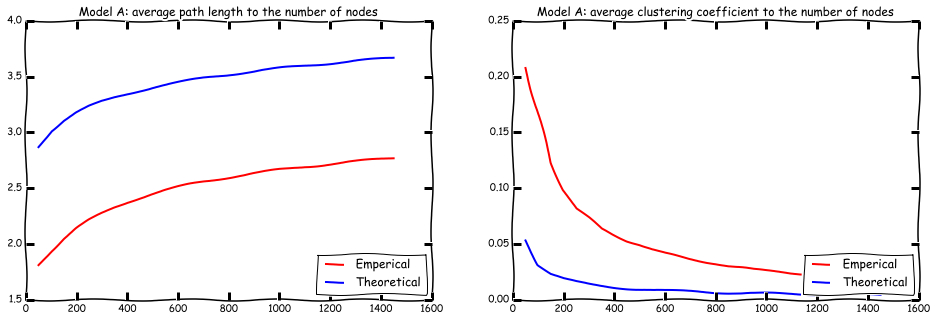

In [262]:
plot_dependencies('A',avrg_path_length_a, avrg_clust_coeff_a,
                 theory_path_len = lambda n: np.log(n)/np.log(np.log(n)),
                 theory_clust_coeff = lambda n: np.power(n,-0.75))

##### 1.3.3 dependence: node degee to the nodes "age".
As one can see, the "older" the node is, the greater her degree

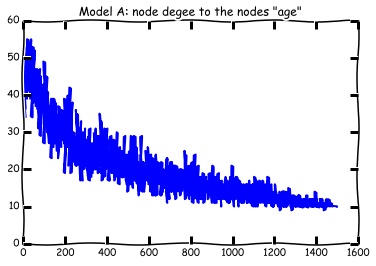

In [274]:
plt.title('Model A: node degee to the nodes "age"')
plt.plot(Ga.nodes(), Ga.degree().values())

### Model B
Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment. 

In [264]:
def random_subset(seq,m):
    #realised as same function in Networkx
    """ Return m unique elements from seq.
    
    This differs from random.sample which can return repeated
    elements if seq holds repeated elements.
    """
    targets=set()
    while len(targets)<m:
        x=np.random.choice(seq)
        targets.add(x)
    return targets

def modelB(N,m, n0,m0, directed = False):
    ## N --- total number of nodes
    ## m --- number of edges which we add on each step
    ## n0 --- initial number of nodes
    ## m0 --- initial number od edges, m0 >= n0
    nodes = list(range(N))
    np.random.shuffle(nodes)
    if not directed:
        G = nx.gnm_random_graph(n0,m0)
    else:
        G = nx.gnm_random_graph(n0,m0, directed = True)

    nx.relabel_nodes(G,mapping = dict(zip(list(range(n0)), nodes[:n0])), copy = False)

    repeated_nodes=[]
    targets = nodes[:n0]
    index = n0
    avrg_path_length = {}
    avrg_clust_coeff = {}
    while index < N:
        if index % 50 == 0:
            avrg_path_length[index] = nx.average_shortest_path_length(G)
            avrg_clust_coeff[index] = nx.average_clustering(G)
        source = nodes[index]
        G.add_edges_from(zip([source]*m,targets))
        repeated_nodes.extend(targets)
        repeated_nodes.extend([source]*m)
        targets = random_subset(repeated_nodes,m)
        index += 1

    return G, avrg_path_length, avrg_clust_coeff

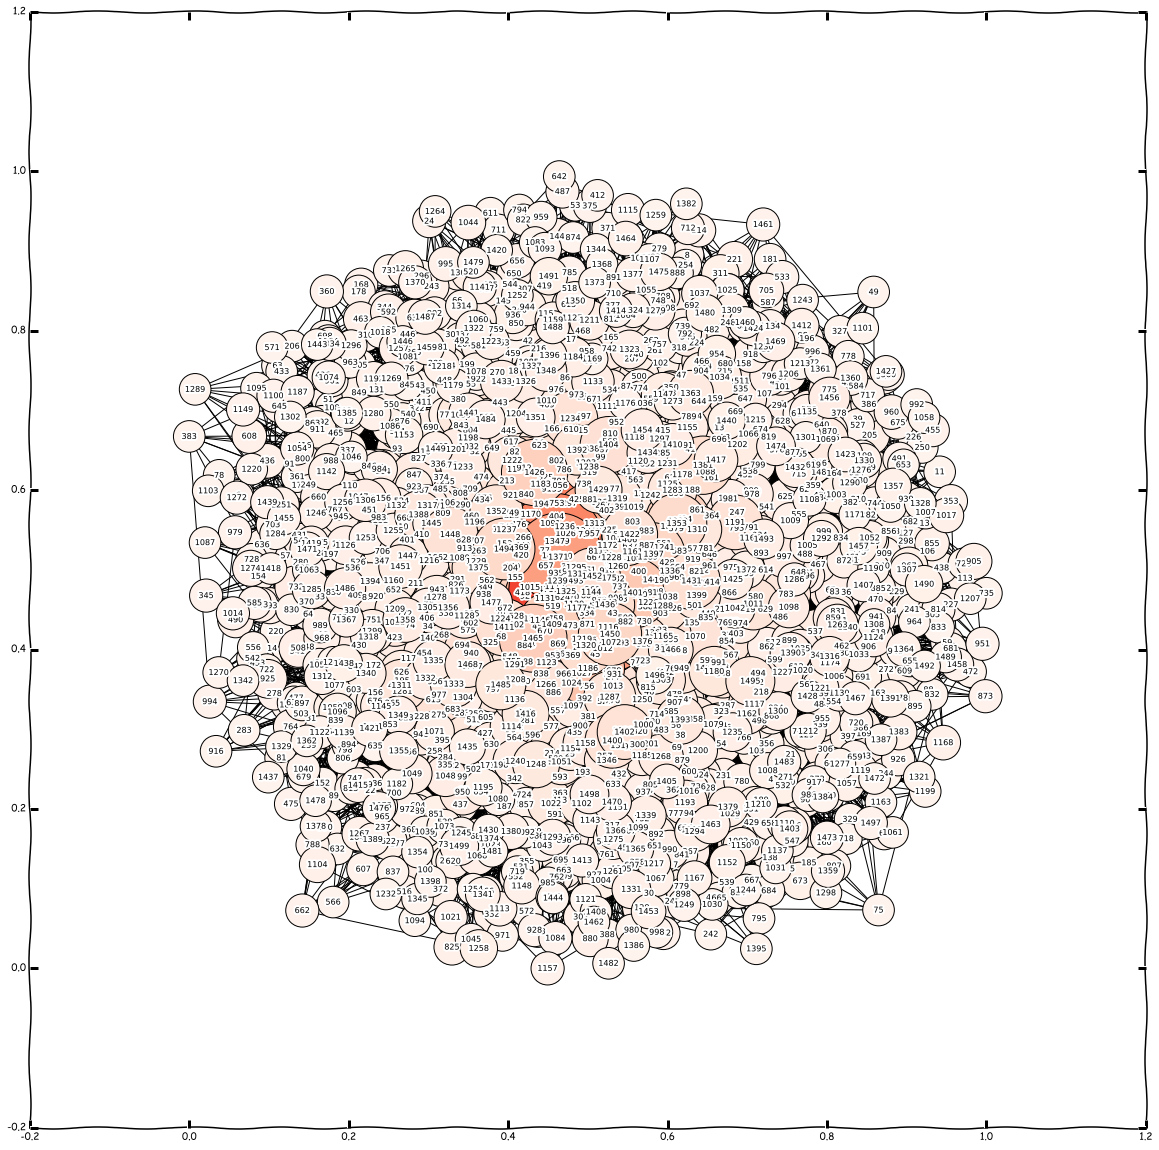

In [265]:
N = 1500
m = 10
n0 = 20
m0 = 25
Gb, avrg_path_length_b, avrg_clust_coeff_b = modelB(N,m,n0,m0)

plot_graph_with_blobs(Gb, node_size_mult = 100, font_size = 8)

#### PDF/CDF
We should expecct, that node degrees have power law distribution.

At the Enperical CDF plot the blue line --- cdf of power law:
$$ F(x) =  1 - \frac{m^2}{k^2}$$

The ECDF differs from Theoretical CDF.

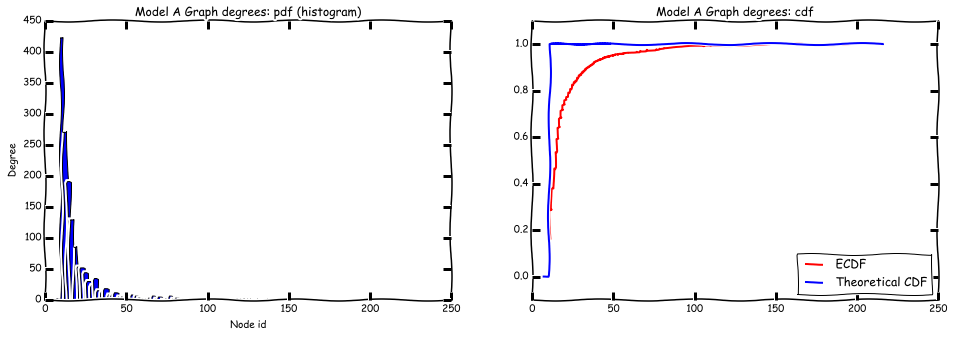

In [270]:
def theory_cdf_b(x, m):
    x = list(x)
    f = []
    for i in x:
        if i >=m:
            f.append(1.0 - m **2 / i**2)
        else:
            f.append(0)
    return f

degrees_pdf_cdf(Gb, theory_cdf = lambda x: theory_cdf_b(x,m))

#### Illustration of dependencies
##### 1.3.1 & 1.3.2: dependence:  average path length to the number of nodes & average clustering coefficient to the number of nodes

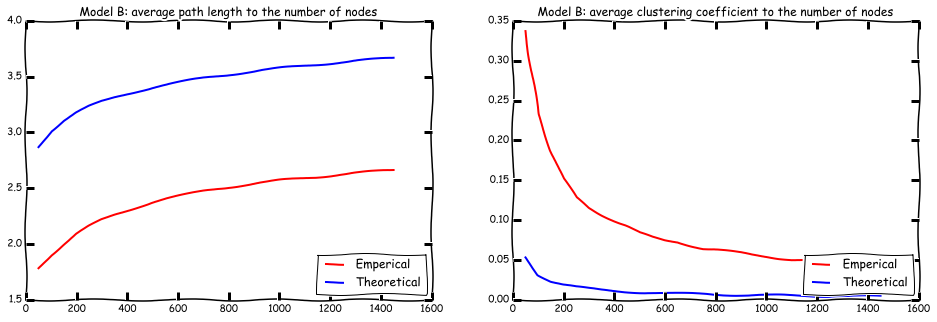

In [272]:
def theory_path_len(n):
    return np.log(n)/np.log(np.log(n))
def theory_clust_coeff(n): 
    return np.power(n,-0.75)

plot_dependencies('B',avrg_path_length_b, avrg_clust_coeff_b,
                 theory_path_len = lambda n: np.log(n)/np.log(np.log(n)),
                 theory_clust_coeff = lambda n: np.power(n,-0.75))


##### 1.3.3 dependence: node degee to the nodes "age".
As we can see at the plot below, without growing property we lost the property "the "older" the node is, the greater her degree"

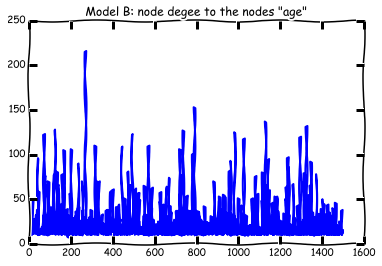

In [276]:
plt.title('Model B: node degee to the nodes "age"')
plt.plot(Gb.nodes(), Gb.degree().values())

### <hr /> Task 2

Consider the following  "Vertex copying model" of growing network.

At every time step a random vertex from already existing vertices is selected and duplicated together with all edges, such that  every edge of the  vertex
* is copied with probability $q$
* is rewired to any other randomly selected vertex with probability $1-q$

In [277]:
def model_vertex_copying(N, q, n0, m0, directed = False):
    ## N --- total number of nodes
    ## q --- probability to save an edge, (1-q) --- to rewind
    ## n0 --- initial number of nodes
    ## m0 --- initial number od edges, m0 >= n0

    if not directed:
        G = nx.gnm_random_graph(n0,m0)
    else:
        G = nx.gnm_random_graph(n0,m0, directed = True)
    nodes = list(range(n0))
    avrg_path_length = {}
    avrg_clust_coeff = {}
    source = n0
    while source < N:
        rand_node = np.random.choice(nodes)
        connected_nodes = list(nx.all_neighbors(G, rand_node))
        for target in connected_nodes:
            #print 'target', target
            if q < np.random.uniform(0,1,1):
                G.add_edge(source, target)
            else:
                nodes.remove(target)
                new_target = np.random.choice(nodes)
                G.add_edge(source, new_target)
                nodes.append(target)       
        nodes.append(source)
        if source % 50 == 0:
            avrg_path_length[source] = nx.average_shortest_path_length(G)
            avrg_clust_coeff[source] = nx.average_clustering(G)
        source +=1
    return G, avrg_path_length, avrg_clust_coeff

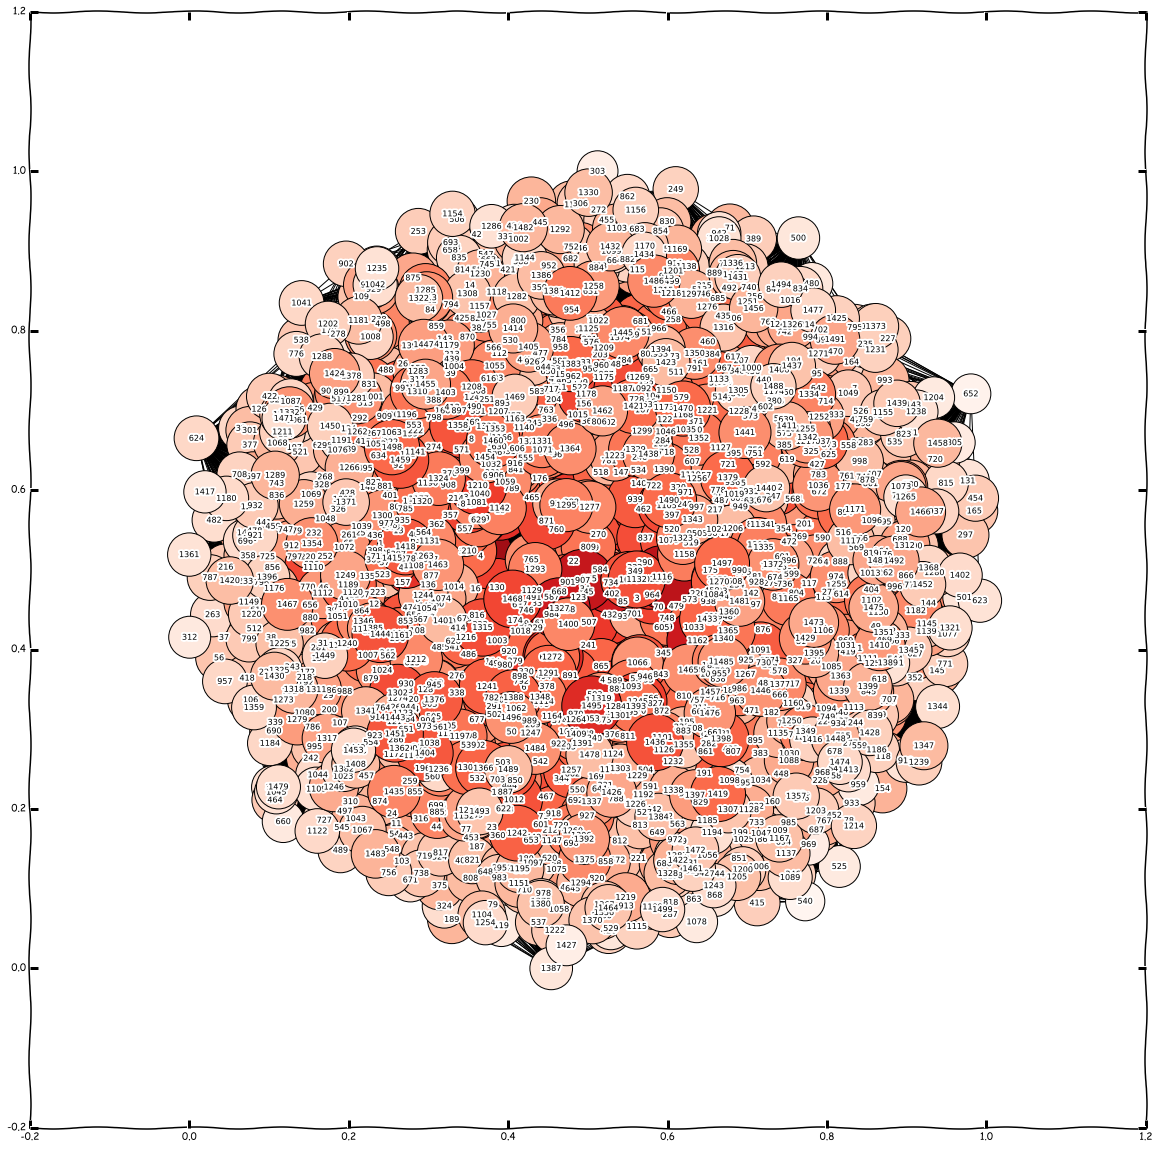

In [288]:
N = 1500
q0 = 0.3
n0 = 10
m0 = 14

G_vc0, avrg_path_length_vc0, avrg_clust_coeff_vc0 = model_vertex_copying(N, q0, n0, m0)
plot_graph_with_blobs(G_vc0, node_size_mult = 10, font_size = 8)

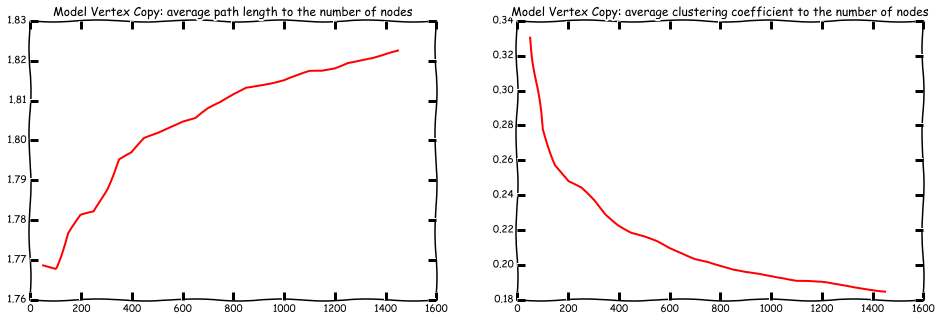

In [290]:
plot_dependencies('Vertex Copy',avrg_path_length_vc0, avrg_clust_coeff_vc0)

Lets look at dependence on the parameter q

In [285]:
N = 1100
q = [0., 0.25, 0.5, 0.75, 1]
n0 = 20
m0 = 25

G_vcopy, avrg_path_length_vcopy, avrg_clust_coeff_vcopy = [], [], [] 
for qi in q:
    Gi, path_len_i, clust_coef_i = model_vertex_copying(N, qi, n0, m0)
    print qi
    G_vcopy.append(Gi)
    avrg_path_length_vcopy.append(path_len_i)
    avrg_clust_coeff_vcopy.append(clust_coef_i)

0.0
0.25
0.5
0.75
1


##### 1.3.1 & 1.3.2: dependence:  average path length to the number of nodes & average clustering coefficient to the number of nodes

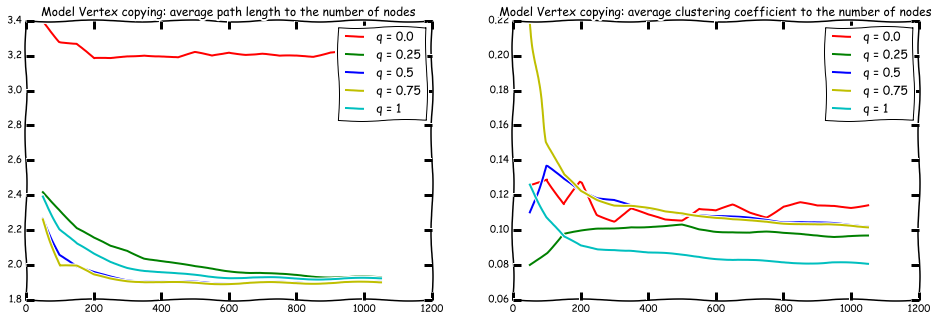

In [301]:
colors = ['r', 'g', 'b', 'y', 'c']
#1.3.1 dependence:  average path length to the number of nodes
plt.figure( figsize = ( 16, 5 ) )
plt.subplot (1, 2, 1)
plt.title('Model Vertex copying: average path length to the number of nodes')
for i in range(len(q)):
    avrg_path_length_vcopy[i] = OrderedDict(sorted(avrg_path_length_vcopy[i].items()))
    plt.plot(avrg_path_length_vcopy[i].keys(), avrg_path_length_vcopy[i].values(), 
             color = colors[i], label = 'q = {0}'.format(q[i]))
plt.legend()

#1.3.2 dependence:  average clustering coefficient to the number of nodes
plt.subplot (1, 2, 2)
plt.title('Model Vertex copying: average clustering coefficient to the number of nodes')
for i in range(len(q)):
    avrg_clust_coeff_vcopy[i] = OrderedDict(sorted(avrg_clust_coeff_vcopy[i].items()))
    plt.plot(avrg_clust_coeff_vcopy[i].keys(), avrg_clust_coeff_vcopy[i].values(), 
             color = colors[i], label = 'q = {0}'.format(q[i]))
plt.legend()

##### 1.3.3 dependence: node degee to the nodes "age".
For all nodes their degree do not depends on their "age" as at Preferential attachment model.

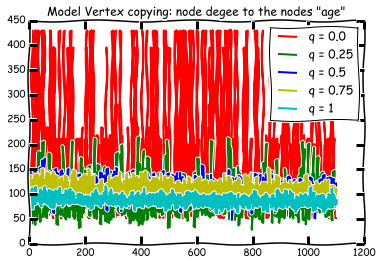

In [304]:
plt.title('Model Vertex copying: node degee to the nodes "age"')
for i in range(len(q)):
    avrg_clust_coeff_vcopy[i] = OrderedDict(sorted(avrg_clust_coeff_vcopy[i].items()))
    plt.plot(G_vcopy[i].nodes(), G_vcopy[i].degree().values(), 
             color = colors[i], label = 'q = {0}'.format(q[i]))
plt.legend()
